In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data='Radiomics_Combined_AllHighGrade.csv'
try:
    df = pd.read_csv(data)
    display(df.head())
except FileNotFoundError:
    print("Error: 'flair_df.csv' not found. Please ensure the file exists in the current directory.")
    df = None # Assign None to df in case of error
except pd.errors.ParserError:
    print("Error: Could not parse 'flair_df.csv'. Please check the file format.")
    df = None # Assign None to df in case of error

,PatientID,SliceIndex,diagnostics_Versions_PyRadiomics,diagnostics_Versions_Numpy,diagnostics_Versions_SimpleITK,diagnostics_Versions_PyWavelet,diagnostics_Versions_Python,diagnostics_Configuration_Settings,diagnostics_Configuration_EnabledImageTypes,diagnostics_Image-original_Hash,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,highGrade
0,Brats17_TCIA_639_1,101,v3.0.1,2.0.2,2.5.0,1.8.0,3.11.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},08bda6c8139d5b335982d5bd8140113d29118c83,...,0.000293,9.011152,0.945165,0.079229,0.000320,0.009377,1.861858e+06,1.710248,1686.648071,False
1,Brats17_TCIA_629_1,78,v3.0.1,2.0.2,2.5.0,1.8.0,3.11.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},c31e5a73a5732e8a4ad86f02c81e1939ad127572,...,0.005884,5.528735,0.261251,78.697214,0.286953,0.019141,8.239363e+01,0.064077,2.205044,False
2,Brats17_CBICA_APY_1,67,v3.0.1,2.0.2,2.5.0,1.8.0,3.11.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},1901f8a92014c367292fb3dbedb601aa9027181a,...,0.004810,6.385418,0.410992,51.015262,0.187594,0.004983,1.481801e+03,0.036407,9.258401,True
3,Brats17_TCIA_266_1,82,v3.0.1,2.0.2,2.5.0,1.8.0,3.11.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},241ac3941eb2ce1510d820ec37709350e972bb30,...,0.013471,5.765159,0.371429,19.073158,0.114002,0.017077,2.811374e+02,0.093395,5.488978,False
4,Brats17_2013_26_1,107,v3.0.1,2.0.2,2.5.0,1.8.0,3.11.12,"{'minimumROIDimensions': 2, 'minimumROISize': ...",{'Original': {}},46c3cd95af3854ff9b51088e19be3ba67aabc019,...,0.020890,5.278502,0.231008,137.173731,0.321399,0.023548,5.046096e+01,0.047850,1.653961,True


### Basic preprocessing

In [5]:
for col in df.columns:
    print(col)

PatientID
SliceIndex
diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Image-original_Mean
diagnostics_Image-original_Minimum
diagnostics_Image-original_Maximum
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_VoxelNum
diagnostics_Mask-original_VolumeNum
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass
original_shape_Elongation
original_shape_Flatness
original_shape_LeastAxisLength
original_shape_MajorAxisLength
original_shape_Maximum2DDiameterColumn
original_shape_Maximum2DDiameterRow
original_shape_Maximum2DDiameter

In [6]:
df.shape

(284, 132)

In [7]:
# Mostrar las columnas cuyo tipo sea 'object'
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns in the DataFrame:")
for col in object_columns:
    print(col)

Object columns in the DataFrame:
PatientID
diagnostics_Versions_PyRadiomics
diagnostics_Versions_Numpy
diagnostics_Versions_SimpleITK
diagnostics_Versions_PyWavelet
diagnostics_Versions_Python
diagnostics_Configuration_Settings
diagnostics_Configuration_EnabledImageTypes
diagnostics_Image-original_Hash
diagnostics_Image-original_Dimensionality
diagnostics_Image-original_Spacing
diagnostics_Image-original_Size
diagnostics_Mask-original_Hash
diagnostics_Mask-original_Spacing
diagnostics_Mask-original_Size
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass


In [8]:
df = df.drop(columns=[
    'PatientID',
    'diagnostics_Versions_PyRadiomics',
'diagnostics_Versions_Numpy',
'diagnostics_Versions_SimpleITK',
'diagnostics_Versions_PyWavelet',
'diagnostics_Versions_Python',
'diagnostics_Configuration_Settings',
'diagnostics_Configuration_EnabledImageTypes',
'diagnostics_Image-original_Hash',
'diagnostics_Image-original_Dimensionality',
'diagnostics_Image-original_Spacing',
'diagnostics_Image-original_Size',
'diagnostics_Mask-original_Hash',
'diagnostics_Mask-original_Spacing',
'diagnostics_Mask-original_Size',
])

In [9]:
# Mostrar las columnas cuyo tipo sea 'object'
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns in the DataFrame:")
for col in object_columns:
    print(col)

Object columns in the DataFrame:
diagnostics_Mask-original_BoundingBox
diagnostics_Mask-original_CenterOfMassIndex
diagnostics_Mask-original_CenterOfMass


In [10]:
df.head()

,SliceIndex,diagnostics_Image-original_Mean,diagnostics_Image-original_Minimum,diagnostics_Image-original_Maximum,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,highGrade
0,101,2353.912471,0.0,32767.0,"(71, 68, 101, 55, 98, 1)",3702,1,"(np.float64(100.1107509454349), np.float64(116...","(100.1107509454349, -122.23230686115613, 101.0)",0.549040,...,0.000293,9.011152,0.945165,0.079229,0.000320,0.009377,1.861858e+06,1.710248,1686.648071,False
1,78,65.503561,0.0,1227.0,"(127, 162, 78, 41, 47, 1)",911,3,"(np.float64(143.75082327113063), np.float64(18...","(143.75082327113063, -49.01427003293085, 78.0)",0.738847,...,0.005884,5.528735,0.261251,78.697214,0.286953,0.019141,8.239363e+01,0.064077,2.205044,False
2,67,43.886972,0.0,1540.0,"(64, 47, 67, 64, 106, 1)",3730,2,"(np.float64(93.30991957104558), np.float64(98....","(93.30991957104558, -140.2833780160858, 67.0)",0.520314,...,0.004810,6.385418,0.410992,51.015262,0.187594,0.004983,1.481801e+03,0.036407,9.258401,True
3,82,52.067842,0.0,912.0,"(119, 55, 82, 30, 37, 1)",770,1,"(np.float64(132.85324675324676), np.float64(74...","(132.85324675324676, -164.7116883116883, 82.0)",0.789864,...,0.013471,5.765159,0.371429,19.073158,0.114002,0.017077,2.811374e+02,0.093395,5.488978,False
4,107,47.119542,0.0,1099.0,"(78, 126, 107, 28, 31, 1)",645,1,"(np.float64(92.16434108527132), np.float64(141...","(92.16434108527132, -97.10542635658913, 107.0)",0.795702,...,0.020890,5.278502,0.231008,137.173731,0.321399,0.023548,5.046096e+01,0.047850,1.653961,True


In [11]:
df = df.drop(columns=[
    'SliceIndex',
    'diagnostics_Image-original_Minimum'
])

In [12]:
df.head()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_BoundingBox,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Mask-original_CenterOfMass,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,...,original_glszm_SmallAreaLowGrayLevelEmphasis,original_glszm_ZoneEntropy,original_glszm_ZonePercentage,original_glszm_ZoneVariance,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength,highGrade
0,2353.912471,32767.0,"(71, 68, 101, 55, 98, 1)",3702,1,"(np.float64(100.1107509454349), np.float64(116...","(100.1107509454349, -122.23230686115613, 101.0)",0.549040,0.0,0.0,...,0.000293,9.011152,0.945165,0.079229,0.000320,0.009377,1.861858e+06,1.710248,1686.648071,False
1,65.503561,1227.0,"(127, 162, 78, 41, 47, 1)",911,3,"(np.float64(143.75082327113063), np.float64(18...","(143.75082327113063, -49.01427003293085, 78.0)",0.738847,0.0,0.0,...,0.005884,5.528735,0.261251,78.697214,0.286953,0.019141,8.239363e+01,0.064077,2.205044,False
2,43.886972,1540.0,"(64, 47, 67, 64, 106, 1)",3730,2,"(np.float64(93.30991957104558), np.float64(98....","(93.30991957104558, -140.2833780160858, 67.0)",0.520314,0.0,0.0,...,0.004810,6.385418,0.410992,51.015262,0.187594,0.004983,1.481801e+03,0.036407,9.258401,True
3,52.067842,912.0,"(119, 55, 82, 30, 37, 1)",770,1,"(np.float64(132.85324675324676), np.float64(74...","(132.85324675324676, -164.7116883116883, 82.0)",0.789864,0.0,0.0,...,0.013471,5.765159,0.371429,19.073158,0.114002,0.017077,2.811374e+02,0.093395,5.488978,False
4,47.119542,1099.0,"(78, 126, 107, 28, 31, 1)",645,1,"(np.float64(92.16434108527132), np.float64(141...","(92.16434108527132, -97.10542635658913, 107.0)",0.795702,0.0,0.0,...,0.020890,5.278502,0.231008,137.173731,0.321399,0.023548,5.046096e+01,0.047850,1.653961,True


In [13]:
df = df.drop(columns=[
    'original_shape_Flatness',
    'original_shape_LeastAxisLength'
])

In [14]:
print("Distribución de la clase highGrade en el DataFrame resultado:")
print(df['highGrade'].value_counts(normalize=True))

Distribución de la clase highGrade en el DataFrame resultado:
highGrade
True     0.735915
False    0.264085
Name: proportion, dtype: float64


# Reformating de columnas

In [15]:
def reordenar_nombre_columna(col):
    partes = col.split('_')
    if len(partes) == 3:
        return f"{partes[2]}/{partes[1]}/{partes[0]}"
    return col

In [16]:
df_new = df.rename(columns=reordenar_nombre_columna)
df_new.head()

,Mean/Image-original/diagnostics,Maximum/Image-original/diagnostics,BoundingBox/Mask-original/diagnostics,VoxelNum/Mask-original/diagnostics,VolumeNum/Mask-original/diagnostics,CenterOfMassIndex/Mask-original/diagnostics,CenterOfMass/Mask-original/diagnostics,Elongation/shape/original,MajorAxisLength/shape/original,Maximum2DDiameterColumn/shape/original,...,SmallAreaLowGrayLevelEmphasis/glszm/original,ZoneEntropy/glszm/original,ZonePercentage/glszm/original,ZoneVariance/glszm/original,Busyness/ngtdm/original,Coarseness/ngtdm/original,Complexity/ngtdm/original,Contrast/ngtdm/original,Strength/ngtdm/original,highGrade
0,2353.912471,32767.0,"(71, 68, 101, 55, 98, 1)",3702,1,"(np.float64(100.1107509454349), np.float64(116...","(100.1107509454349, -122.23230686115613, 101.0)",0.549040,93.921053,55.0,...,0.000293,9.011152,0.945165,0.079229,0.000320,0.009377,1.861858e+06,1.710248,1686.648071,False
1,65.503561,1227.0,"(127, 162, 78, 41, 47, 1)",911,3,"(np.float64(143.75082327113063), np.float64(18...","(143.75082327113063, -49.01427003293085, 78.0)",0.738847,45.042896,38.0,...,0.005884,5.528735,0.261251,78.697214,0.286953,0.019141,8.239363e+01,0.064077,2.205044,False
2,43.886972,1540.0,"(64, 47, 67, 64, 106, 1)",3730,2,"(np.float64(93.30991957104558), np.float64(98....","(93.30991957104558, -140.2833780160858, 67.0)",0.520314,103.622828,64.0,...,0.004810,6.385418,0.410992,51.015262,0.187594,0.004983,1.481801e+03,0.036407,9.258401,True
3,52.067842,912.0,"(119, 55, 82, 30, 37, 1)",770,1,"(np.float64(132.85324675324676), np.float64(74...","(132.85324675324676, -164.7116883116883, 82.0)",0.789864,35.801231,29.0,...,0.013471,5.765159,0.371429,19.073158,0.114002,0.017077,2.811374e+02,0.093395,5.488978,False
4,47.119542,1099.0,"(78, 126, 107, 28, 31, 1)",645,1,"(np.float64(92.16434108527132), np.float64(141...","(92.16434108527132, -97.10542635658913, 107.0)",0.795702,32.478055,28.0,...,0.020890,5.278502,0.231008,137.173731,0.321399,0.023548,5.046096e+01,0.047850,1.653961,True


In [17]:
import re
import numpy as np

def tuple_extraction(df):
    for col in df.columns:
        try:
            sample_val = df[col].iloc[0]

            # Determinar si es string o ya tupla
            if isinstance(sample_val, str):
                try:
                    # Evitar usar ast.literal_eval si contiene 'np.float' (inseguro para literal_eval)
                    if 'np.float' in sample_val:
                        raise ValueError("Contiene np.float, se evalúa directamente")
                    parsed = ast.literal_eval(sample_val)
                except:
                    parsed = eval(sample_val)  # ¡Precaución! Solo usar si confías en el origen del dato
            else:
                parsed = sample_val

            if isinstance(parsed, tuple):
                if re.search('BoundingBox', col) or re.search('CenterOfMassIndex', col) or re.search('CenterOfMass', col):
                    x_vals, y_vals, z_vals, vols = [], [], [], []

                    for val in df[col]:
                        t = eval(val) if isinstance(val, str) else val  # eval necesario para np.float64

                        if len(t) >= 3:
                            x, y, z = t[:3]
                            x_vals.append(float(x))
                            y_vals.append(float(y))
                            z_vals.append(float(z))
                        else:
                            x_vals.append(None)
                            y_vals.append(None)
                            z_vals.append(None)

                        if len(t) >= 6:
                            vol = float(t[-3]) * float(t[-2]) * float(t[-1])
                            vols.append(vol)
                        else:
                            vols.append(None)

                    df[f"x.{col}"] = x_vals
                    df[f"y.{col}"] = y_vals
                    df[f"z.{col}"] = z_vals

                    if "BoundingBox" in col:
                        df[col] = vols
                    else:
                        df.drop(columns=[col], inplace=True)

                else:
                    vols = []
                    for val in df[col]:
                        t = eval(val) if isinstance(val, str) else val
                        if isinstance(t, tuple) and len(t) >= 3:
                            vol = float(t[-3]) * float(t[-2]) * float(t[-1])
                            vols.append(vol)
                        else:
                            vols.append(None)
                    df[col] = vols

        except Exception as e:
            print(f"[WARN] Columna {col} no se pudo procesar: {e}")
            continue


In [18]:
tuple_extraction(df_new)

In [19]:
df_new.head()

,Mean/Image-original/diagnostics,Maximum/Image-original/diagnostics,BoundingBox/Mask-original/diagnostics,VoxelNum/Mask-original/diagnostics,VolumeNum/Mask-original/diagnostics,Elongation/shape/original,MajorAxisLength/shape/original,Maximum2DDiameterColumn/shape/original,Maximum2DDiameterRow/shape/original,Maximum2DDiameterSlice/shape/original,...,highGrade,x.BoundingBox/Mask-original/diagnostics,y.BoundingBox/Mask-original/diagnostics,z.BoundingBox/Mask-original/diagnostics,x.CenterOfMassIndex/Mask-original/diagnostics,y.CenterOfMassIndex/Mask-original/diagnostics,z.CenterOfMassIndex/Mask-original/diagnostics,x.CenterOfMass/Mask-original/diagnostics,y.CenterOfMass/Mask-original/diagnostics,z.CenterOfMass/Mask-original/diagnostics
0,2353.912471,32767.0,5390.0,3702,1,0.549040,93.921053,55.0,94.0,98.615415,...,False,71.0,68.0,101.0,100.110751,116.767693,101.0,100.110751,-122.232307,101.0
1,65.503561,1227.0,1927.0,911,3,0.738847,45.042896,38.0,47.0,47.853944,...,False,127.0,162.0,78.0,143.750823,189.985730,78.0,143.750823,-49.014270,78.0
2,43.886972,1540.0,6784.0,3730,2,0.520314,103.622828,64.0,105.0,106.169676,...,True,64.0,47.0,67.0,93.309920,98.716622,67.0,93.309920,-140.283378,67.0
3,52.067842,912.0,1110.0,770,1,0.789864,35.801231,29.0,34.0,38.275318,...,False,119.0,55.0,82.0,132.853247,74.288312,82.0,132.853247,-164.711688,82.0
4,47.119542,1099.0,868.0,645,1,0.795702,32.478055,28.0,31.0,33.015148,...,True,78.0,126.0,107.0,92.164341,141.894574,107.0,92.164341,-97.105426,107.0


### Statistics

Missing values per column:
 Mean/Image-original/diagnostics                  0
Maximum/Image-original/diagnostics               0
BoundingBox/Mask-original/diagnostics            0
VoxelNum/Mask-original/diagnostics               0
VolumeNum/Mask-original/diagnostics              0
                                                ..
y.CenterOfMassIndex/Mask-original/diagnostics    0
z.CenterOfMassIndex/Mask-original/diagnostics    0
x.CenterOfMass/Mask-original/diagnostics         0
y.CenterOfMass/Mask-original/diagnostics         0
z.CenterOfMass/Mask-original/diagnostics         0
Length: 120, dtype: int64

Number of duplicated rows: 0

Summary Statistics:
        Mean/Image-original/diagnostics  Maximum/Image-original/diagnostics  \
count                       284.000000                          284.000000   
mean                         70.376473                         1390.299296   
std                         213.939335                         3782.796872   
min                  

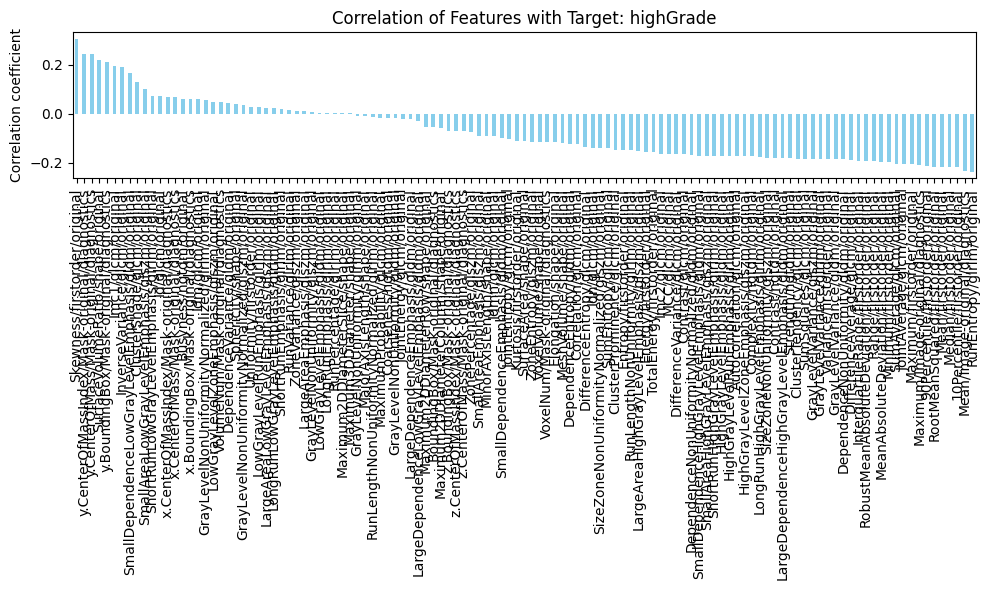

'\n# Histograms of numerical features\ndf.hist(figsize=(20, 20), bins=50)\nplt.suptitle("Histograms of Numerical Features")\nplt.show()\n\n# Pairplot for a subset of features\nsns.pairplot(df[[\'Strength\', \'Size.a\', \'Size.b\', \'Size.c\']], diag_kind="kde")\nplt.suptitle("Pairplot of Selected Features")\nplt.show()'

In [20]:
### Numerical Statistiques

# Check for missing values
print("Missing values per column:\n", df_new.isnull().sum())

# Check for duplicated rows
print(f"\nNumber of duplicated rows: {df_new.duplicated().sum()}")

# Summary statistics
print("\nSummary Statistics:\n", df_new.describe())


correlation_with_target = df_new.corr()['highGrade'].drop('highGrade').sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target: highGrade')
plt.ylabel('Correlation coefficient')
plt.tight_layout()
plt.show()


'''
# Histograms of numerical features
df.hist(figsize=(20, 20), bins=50)
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Pairplot for a subset of features
sns.pairplot(df[['Strength', 'Size.a', 'Size.b', 'Size.c']], diag_kind="kde")
plt.suptitle("Pairplot of Selected Features")
plt.show()'''

Skewness/firstorder/original                     0.305156
y.CenterOfMassIndex/Mask-original/diagnostics    0.245198
y.CenterOfMass/Mask-original/diagnostics         0.245198
RunEntropy/glrlm/original                        0.236534
Mean/Image-original/diagnostics                  0.231559
SurfaceVolumeRatio/shape/original                0.218663
10Percentile/firstorder/original                 0.218478
Median/firstorder/original                       0.217533
Mean/firstorder/original                         0.216442
RootMeanSquared/firstorder/original              0.215970
y.BoundingBox/Mask-original/diagnostics          0.213063
90Percentile/firstorder/original                 0.213016
Maximum/Image-original/diagnostics               0.209523
Maximum/firstorder/original                      0.205996
JointAverage/glcm/original                       0.203052
Name: highGrade, dtype: float64


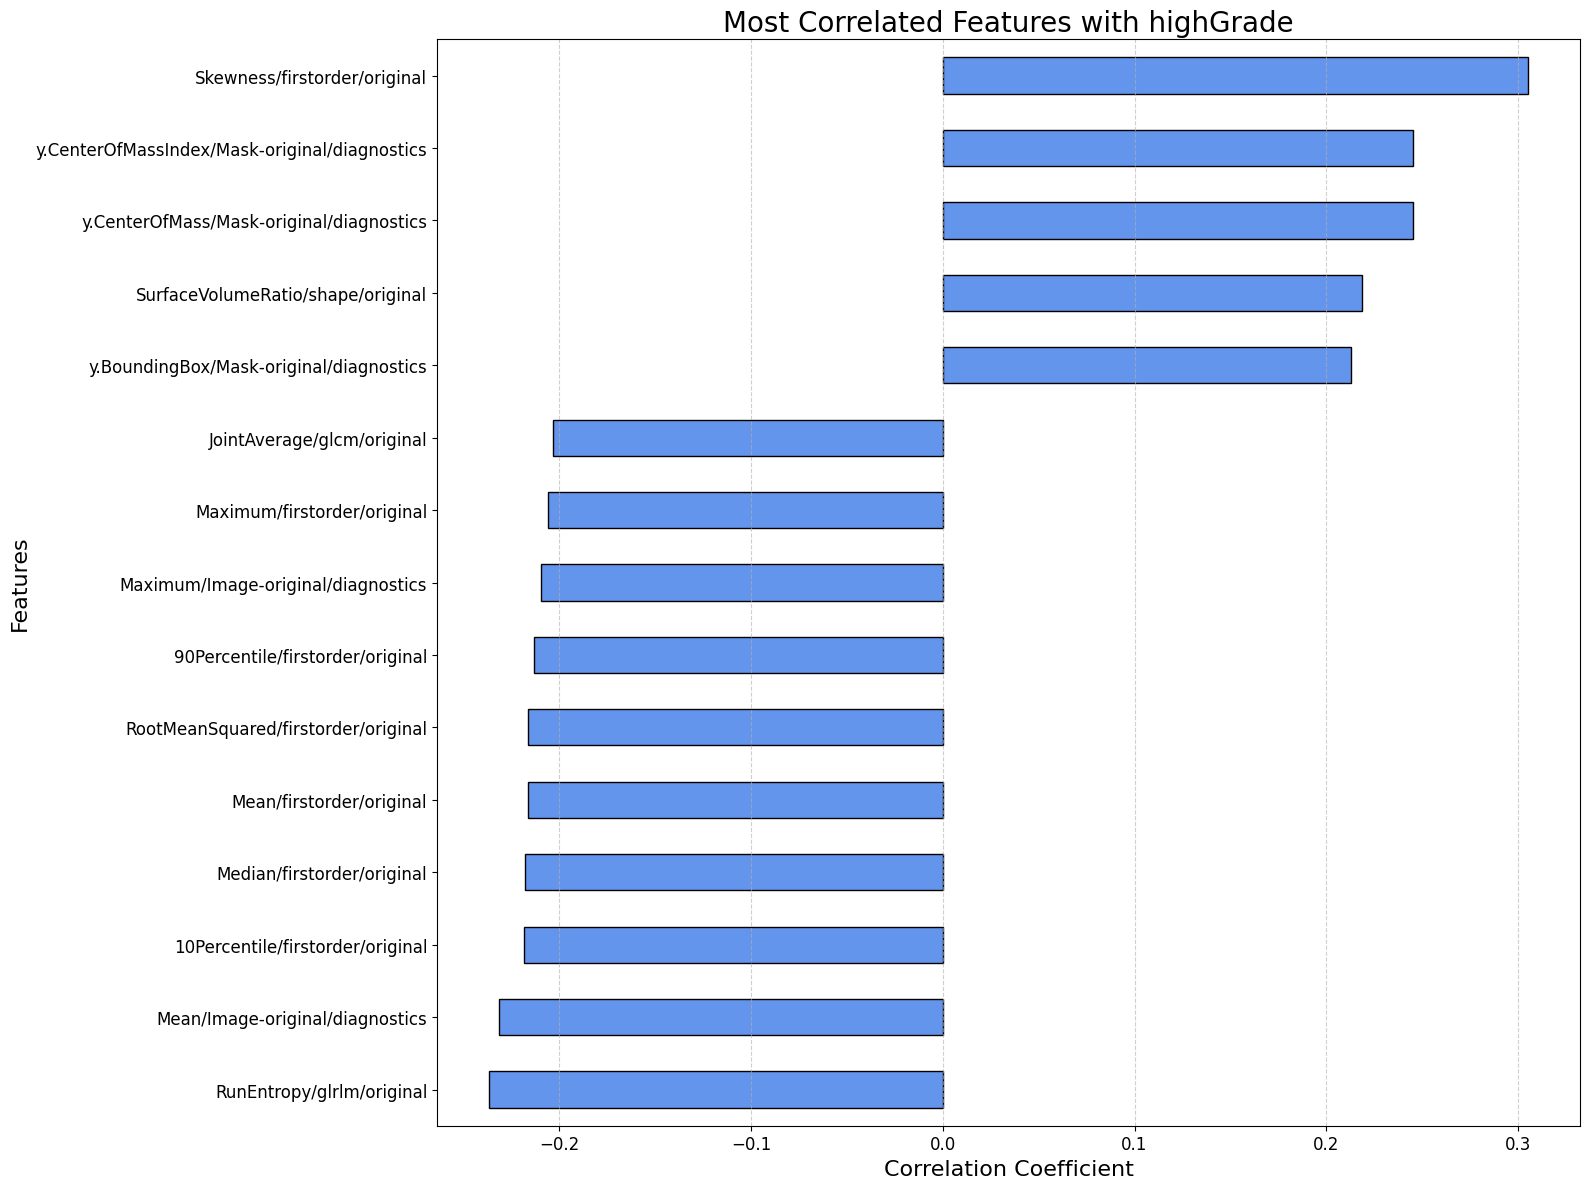

In [21]:

# Get top 30 features by absolute correlation
top = correlation_with_target.abs().sort_values(ascending=False).head(15)

print(top)

# Retrieve original signed correlations for those top 30 features
top_signed = correlation_with_target[top.index]


# Plot
plt.figure(figsize=(16, 12))  # Bigger figure size
top_signed.sort_values().plot(
    kind='barh',
    color='cornflowerblue',
    edgecolor='black'
)

plt.title('Most Correlated Features with highGrade', fontsize=20)
plt.xlabel('Correlation Coefficient', fontsize=16)
plt.ylabel('Features', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [22]:
# Guardar el df_new en un csv con el highGrade
df_new.to_csv('Radiomics_Combined_AllHighGrade_processed.csv', index=False)


In [23]:
# Guardar en un csv el df_new pero solo con las columnas con más correlación con highGrade junto a el highGrade
top_features = top_signed.index.tolist() + ['highGrade']
top_df = df_new[top_features]
top_output_file = 'Radiomics_TopFeatures_AllHighGrade.csv'
top_df.to_csv(top_output_file, index=False)

In [24]:
top_df.head()

,Skewness/firstorder/original,y.CenterOfMassIndex/Mask-original/diagnostics,y.CenterOfMass/Mask-original/diagnostics,RunEntropy/glrlm/original,Mean/Image-original/diagnostics,SurfaceVolumeRatio/shape/original,10Percentile/firstorder/original,Median/firstorder/original,Mean/firstorder/original,RootMeanSquared/firstorder/original,y.BoundingBox/Mask-original/diagnostics,90Percentile/firstorder/original,Maximum/Image-original/diagnostics,Maximum/firstorder/original,JointAverage/glcm/original,highGrade
0,-0.937782,116.767693,-122.232307,8.859025,2353.912471,2.067681,18231.3,22908.5,22543.731496,22833.262757,68.0,26816.6,32767.0,27974.0,646.450388,False
1,0.057549,189.985730,-49.014270,4.862720,65.503561,2.211166,504.0,601.0,610.026345,616.412168,162.0,736.0,1227.0,775.0,13.136721,False
2,2.081790,98.716622,-140.283378,5.434135,43.886972,2.168255,318.0,444.0,477.488204,504.717626,47.0,656.1,1540.0,1371.0,16.930629,True
3,-1.399489,74.288312,-164.711688,4.942474,52.067842,2.139264,281.6,484.5,450.737662,466.609512,55.0,569.0,912.0,621.0,17.609370,False
4,-0.572993,141.894574,-97.105426,4.727781,47.119542,2.146877,414.4,518.0,510.646512,514.641462,126.0,587.6,1099.0,642.0,9.146565,True


# Análisis univariado de las mejores features

In [25]:
df = pd.read_csv("outputDir/prepared_data.csv")

# Estadísticas relevantes de las features seleccionadas

- yCenterOfMassIndex/Mask-original/diagnostics

- yBoundingBox/Mask-original/diagnostics

- RunLengthNonUniformity/glrlm/original

- GrayLevelNonUniformity/glszm/original

- GrayLevelNonUniformity/glrlm/original

- LargeDependenceHighGrayLevelEmphasis/gldm/original

- Energy/firstorder/original

- ZoneEntropy/glszm/original

- VoxelNum/Mask-original/diagnostics

- TotalEnergy/firstorder/original

- Maximum/Image-original/diagnostics

- Idn/glcm/original

- SmallDependenceLowGrayLevelEmphasis/gldm/original

- Coarseness/ngtdm/original

- VolumeNum/Mask-original/diagnostics

## yCenterOfMassIndex/Mask-original/diagnostics

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\1321678582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['y.CenterOfMassIndex/Mask-original/diagnostics'], palette='muted')


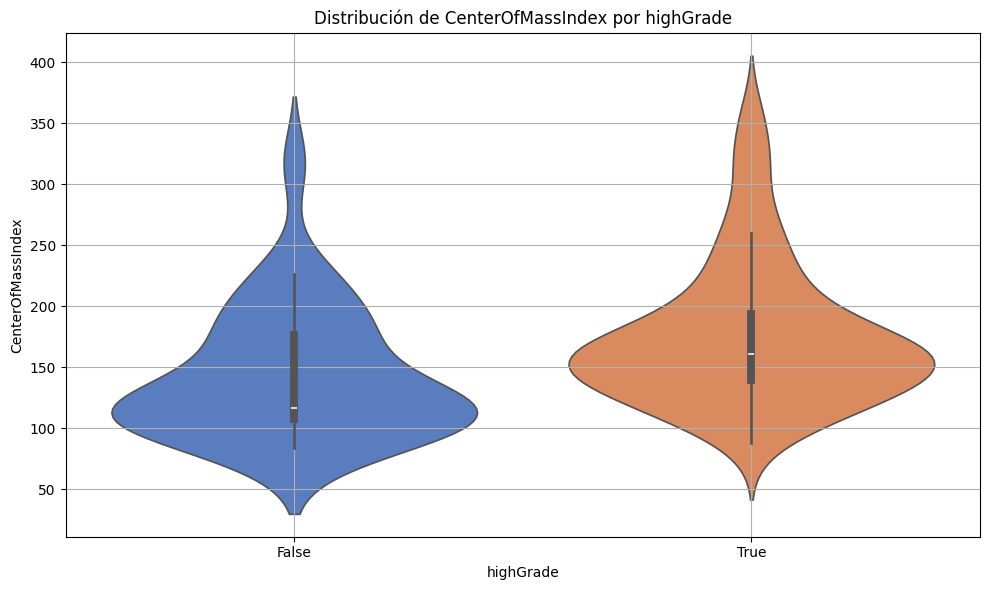

In [28]:
# Revisar la distribución de los valores de y.CenterOfMassIndex/Mask-original/diagnostics respecto a la variable objetivo 'highGrade' en un gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['y.CenterOfMassIndex/Mask-original/diagnostics'], palette='muted')
plt.title('Distribución de CenterOfMassIndex por highGrade')
plt.xlabel('highGrade')
plt.ylabel('CenterOfMassIndex')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Encontrar el promedio de y.CenterOfMassIndex/Mask-original/diagnostics para cada clase
mean_values = df.groupby('highGrade')['y.CenterOfMassIndex/Mask-original/diagnostics'].mean()
print("\nPromedio de y.CenterOfMassIndex/Mask-original/diagnostics por clase:")
print(mean_values)


Promedio de y.CenterOfMassIndex/Mask-original/diagnostics por clase:
highGrade
False    142.774329
True     175.197925
Name: y.CenterOfMassIndex/Mask-original/diagnostics, dtype: float64


## yBoundingBox/Mask-original/diagnostics

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\1027665636.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['y.BoundingBox/Mask-original/diagnostics'], palette='muted')


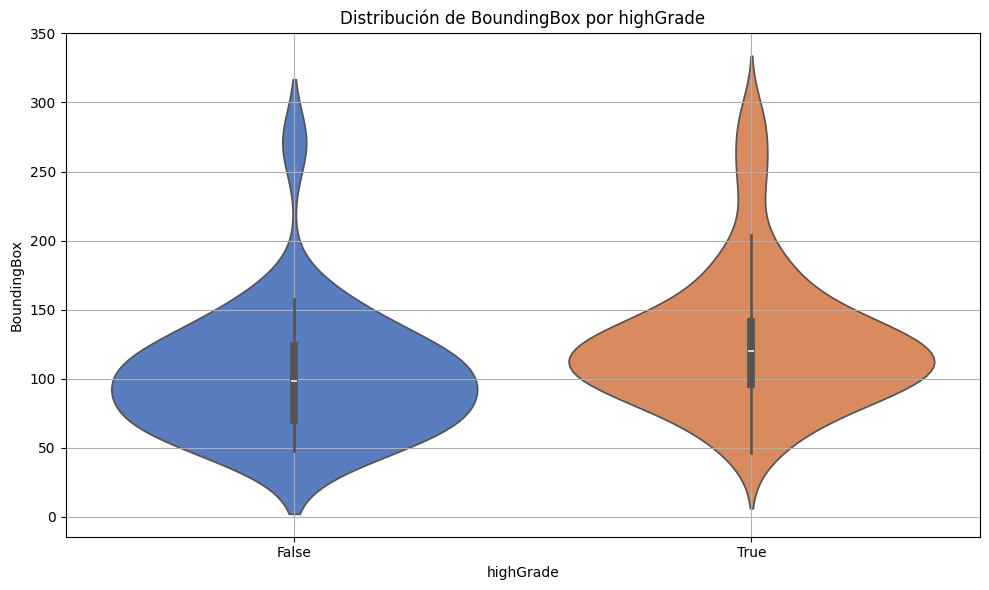

In [30]:
# Revisar la distribución de los valores de y.BoundingBox/Mask-original/diagnostics respecto a la variable objetivo 'highGrade' en un gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['y.BoundingBox/Mask-original/diagnostics'], palette='muted')
plt.title('Distribución de BoundingBox por highGrade')
plt.xlabel('highGrade')
plt.ylabel('BoundingBox')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
# Encontrar el promedio de y.BoundingBox/Mask-original/diagnostics para cada clase
mean_values = df.groupby('highGrade')['y.BoundingBox/Mask-original/diagnostics'].mean()
print("\nPromedio de y.BoundingBox/Mask-original/diagnostics por clase:")
print(mean_values)


Promedio de y.BoundingBox/Mask-original/diagnostics por clase:
highGrade
False    102.344828
True     126.929293
Name: y.BoundingBox/Mask-original/diagnostics, dtype: float64


## RunLengthNonUniformity/glrlm/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\1703138951.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['RunLengthNonUniformity/glrlm/original'], palette='muted')


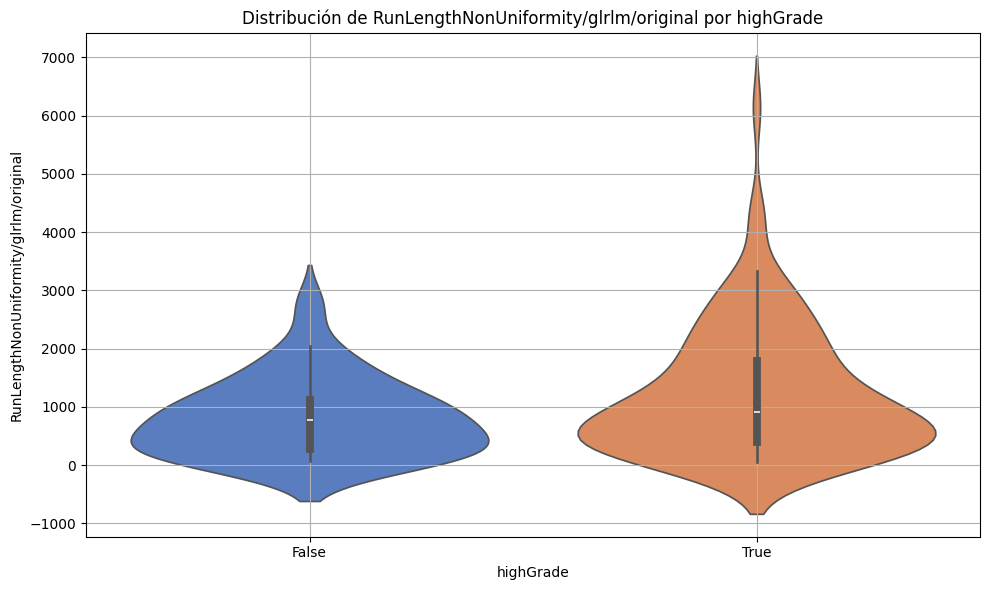

In [32]:
# Revisar la distribución de los valores de RunLengthNonUniformity/glrlm/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['RunLengthNonUniformity/glrlm/original'], palette='muted')
plt.title('Distribución de RunLengthNonUniformity/glrlm/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('RunLengthNonUniformity/glrlm/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Encontrar el promedio de RunLengthNonUniformity/glrlm/original para cada clase
mean_values = df.groupby('highGrade')['RunLengthNonUniformity/glrlm/original'].mean()
print("\nPromedio de RunLengthNonUniformity/glrlm/original por clase:")
print(mean_values)


Promedio de RunLengthNonUniformity/glrlm/original por clase:
highGrade
False     806.290156
True     1232.244772
Name: RunLengthNonUniformity/glrlm/original, dtype: float64


## GrayLevelNonUniformity/glszm/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\110978598.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['GrayLevelNonUniformity/glszm/original'], palette='muted')


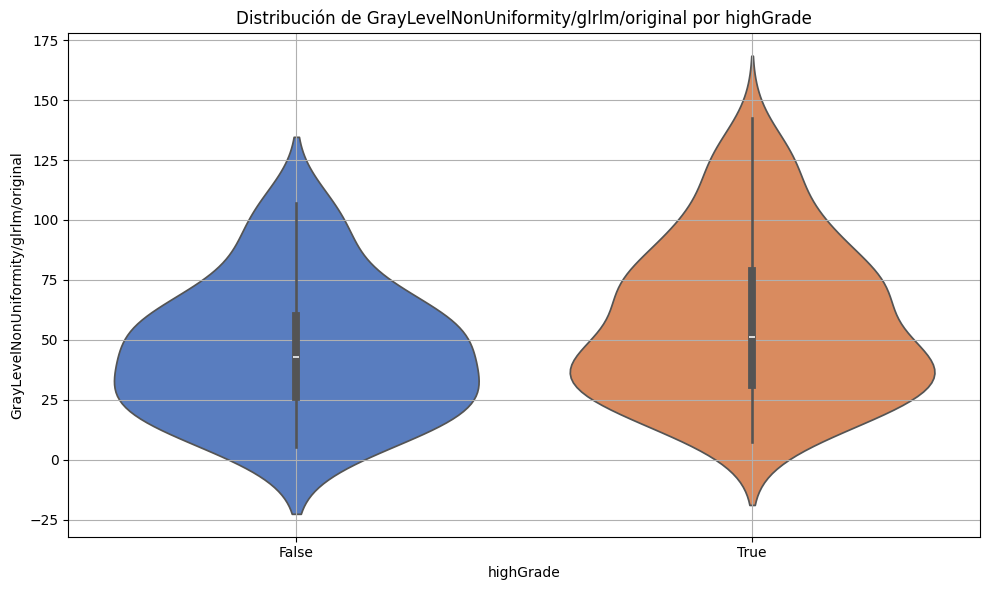

In [64]:
# Revisar la distribución de los valores de GrayLevelNonUniformity/glszm/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['GrayLevelNonUniformity/glszm/original'], palette='muted')
plt.title('Distribución de GrayLevelNonUniformity/glrlm/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('GrayLevelNonUniformity/glrlm/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [65]:
# Encontrar el promedio de GrayLevelNonUniformity/glszm/original para cada clase
mean_values = df.groupby('highGrade')['GrayLevelNonUniformity/glszm/original'].mean()
print("\nPromedio de GrayLevelNonUniformity/glszm/original por clase:")
print(mean_values)


Promedio de GrayLevelNonUniformity/glszm/original por clase:
highGrade
False    45.641133
True     58.485087
Name: GrayLevelNonUniformity/glszm/original, dtype: float64


## GrayLevelNonUniformity/glrlm/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\2368288890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['GrayLevelNonUniformity/glrlm/original'], palette='muted')


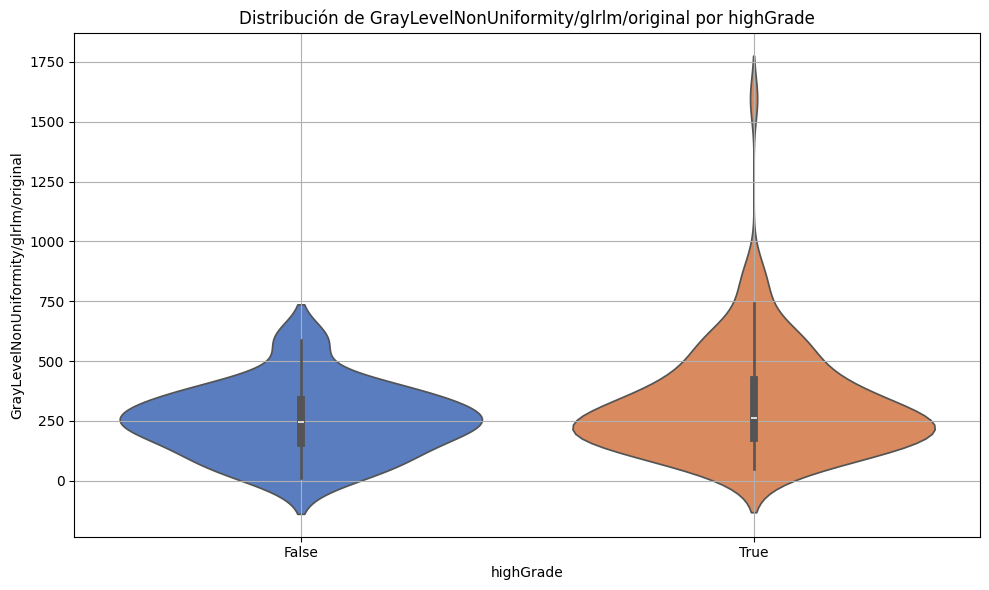

In [36]:
# Revisar la distribución de los valores de GrayLevelNonUniformity/glrlm/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['GrayLevelNonUniformity/glrlm/original'], palette='muted')
plt.title('Distribución de GrayLevelNonUniformity/glrlm/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('GrayLevelNonUniformity/glrlm/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# Encontrar el promedio de GrayLevelNonUniformity/glrlm/original para cada clase
mean_values = df.groupby('highGrade')['GrayLevelNonUniformity/glrlm/original'].mean()
print("\nPromedio de GrayLevelNonUniformity/glrlm/original por clase:")
print(mean_values)


Promedio de GrayLevelNonUniformity/glrlm/original por clase:
highGrade
False    252.521435
True     325.856045
Name: GrayLevelNonUniformity/glrlm/original, dtype: float64


## LargeDependenceHighGrayLevelEmphasis/gldm/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\1372236399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['LargeDependenceHighGrayLevelEmphasis/gldm/original'], palette='muted')


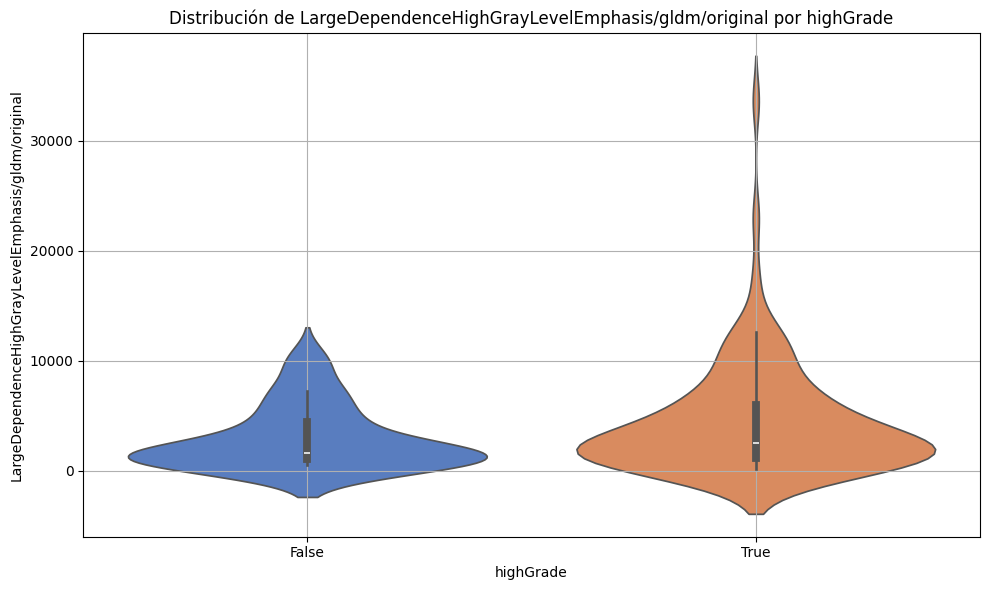

In [38]:
# Revisar la distribución de los valores de LargeDependenceHighGrayLevelEmphasis/gldm/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['LargeDependenceHighGrayLevelEmphasis/gldm/original'], palette='muted')
plt.title('Distribución de LargeDependenceHighGrayLevelEmphasis/gldm/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('LargeDependenceHighGrayLevelEmphasis/gldm/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
# Encontrar el promedio de LargeDependenceHighGrayLevelEmphasis/gldm/original para cada clase
mean_values = df.groupby('highGrade')['LargeDependenceHighGrayLevelEmphasis/gldm/original'].mean()
print("\nPromedio de LargeDependenceHighGrayLevelEmphasis/gldm/original por clase:")
print(mean_values)


Promedio de LargeDependenceHighGrayLevelEmphasis/gldm/original por clase:
highGrade
False    2934.545991
True     4494.904405
Name: LargeDependenceHighGrayLevelEmphasis/gldm/original, dtype: float64


## Energy/firstorder/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\41727378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['Energy/firstorder/original'], palette='muted')


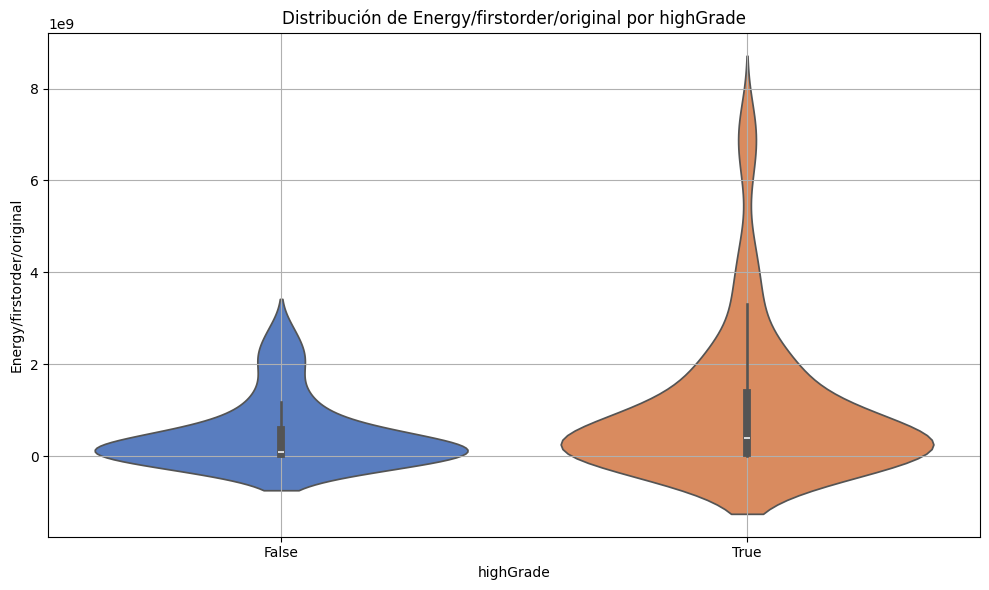

In [40]:
# Revisar la distribución de los valores de Energy/firstorder/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['Energy/firstorder/original'], palette='muted')
plt.title('Distribución de Energy/firstorder/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('Energy/firstorder/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [41]:
# Encontrar el promedio de Energy/firstorder/original para cada clase
mean_values = df.groupby('highGrade')['Energy/firstorder/original'].mean()
print("\nPromedio de Energy/firstorder/original por clase:")
print(mean_values)


Promedio de Energy/firstorder/original por clase:
highGrade
False    4.896903e+08
True     1.019922e+09
Name: Energy/firstorder/original, dtype: float64


## ZoneEntropy/glszm/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\3962347551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['ZoneEntropy/glszm/original'], palette='muted')


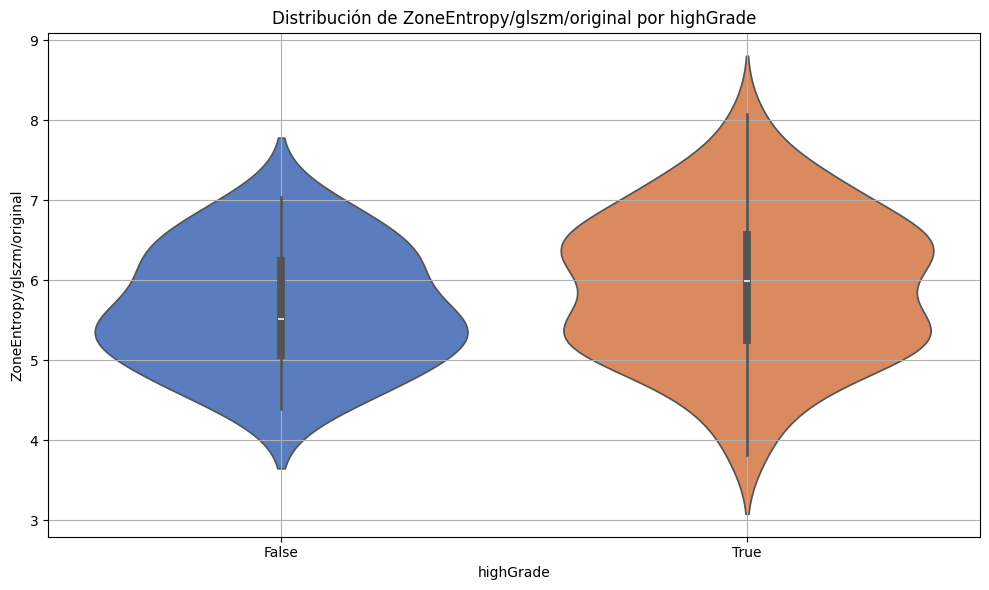

In [42]:
# Revisar la distribución de los valores de ZoneEntropy/glszm/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['ZoneEntropy/glszm/original'], palette='muted')
plt.title('Distribución de ZoneEntropy/glszm/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('ZoneEntropy/glszm/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# Encontrar el promedio de ZoneEntropy/glszm/original para cada clase
mean_values = df.groupby('highGrade')['ZoneEntropy/glszm/original'].mean()
print("\nPromedio de ZoneEntropy/glszm/original por clase:")
print(mean_values)


Promedio de ZoneEntropy/glszm/original por clase:
highGrade
False    5.64943
True     5.93325
Name: ZoneEntropy/glszm/original, dtype: float64


## VoxelNum/Mask-original/diagnostics

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\2115027272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['VoxelNum/Mask-original/diagnostics'], palette='muted')


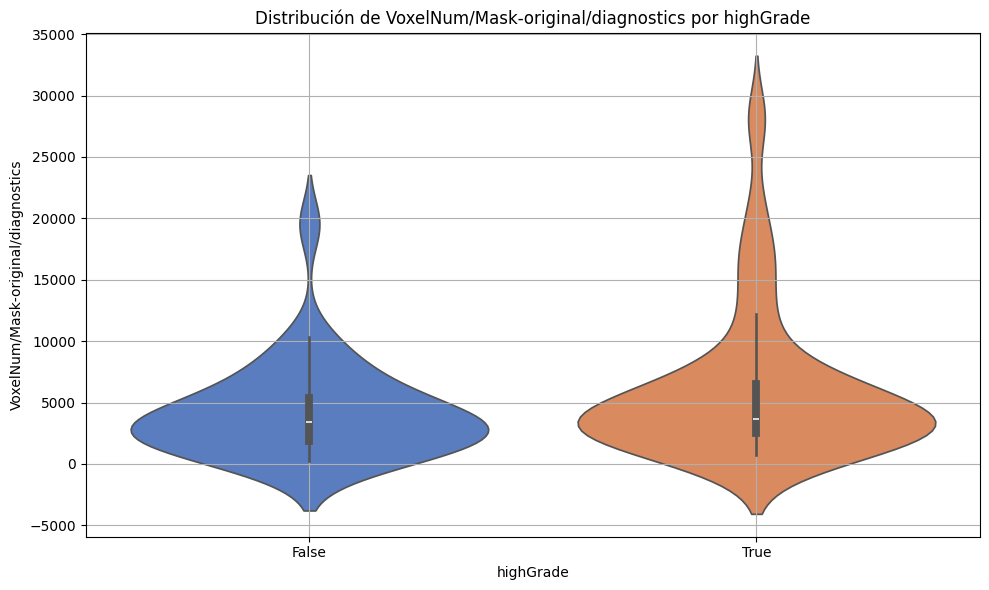

In [44]:
# Revisar la distribución de los valores de VoxelNum/Mask-original/diagnostics para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['VoxelNum/Mask-original/diagnostics'], palette='muted')
plt.title('Distribución de VoxelNum/Mask-original/diagnostics por highGrade')
plt.xlabel('highGrade')
plt.ylabel('VoxelNum/Mask-original/diagnostics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
# Encontrar el promedio de VoxelNum/Mask-original/diagnostics para cada clase
mean_values = df.groupby('highGrade')['VoxelNum/Mask-original/diagnostics'].mean()
print("\nPromedio de VoxelNum/Mask-original/diagnostics por clase:")
print(mean_values)


Promedio de VoxelNum/Mask-original/diagnostics por clase:
highGrade
False    4269.689655
True     6008.818182
Name: VoxelNum/Mask-original/diagnostics, dtype: float64


## TotalEnergy/firstorder/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\2507259164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['TotalEnergy/firstorder/original'], palette='muted')


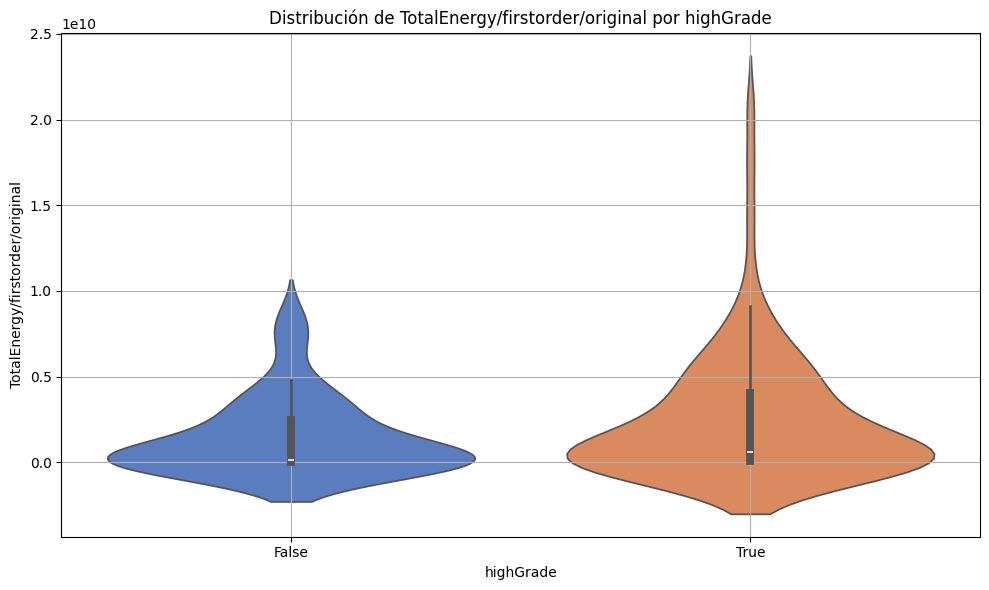

In [46]:
# Revisar la distribución de los valores de TotalEnergy/firstorder/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['TotalEnergy/firstorder/original'], palette='muted')
plt.title('Distribución de TotalEnergy/firstorder/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('TotalEnergy/firstorder/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [47]:
# Encontrar el promedio de TotalEnergy/firstorder/original para cada clase
mean_values = df.groupby('highGrade')['TotalEnergy/firstorder/original'].mean()
print("\nPromedio de TotalEnergy/firstorder/original por clase:")
print(mean_values)


Promedio de TotalEnergy/firstorder/original por clase:
highGrade
False    1.505725e+09
True     2.580768e+09
Name: TotalEnergy/firstorder/original, dtype: float64


## Maximum/Image-original/diagnostics

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\992390415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['Maximum/Image-original/diagnostics'], palette='muted')


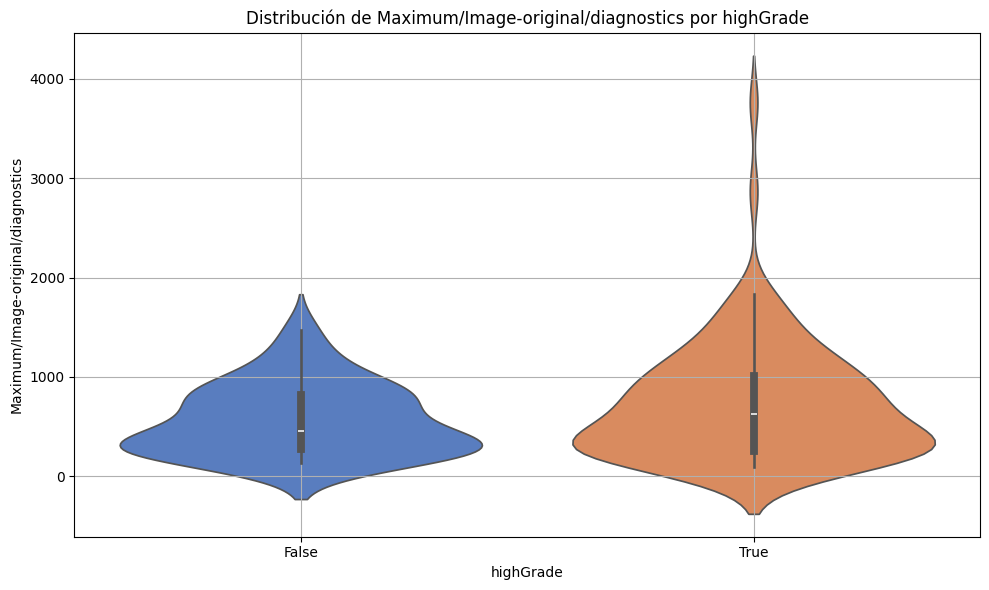

In [48]:
# Revisar la distribución de los valores de Maximum/Image-original/diagnostics para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['Maximum/Image-original/diagnostics'], palette='muted')
plt.title('Distribución de Maximum/Image-original/diagnostics por highGrade')
plt.xlabel('highGrade')
plt.ylabel('Maximum/Image-original/diagnostics')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
# Encontrar el promedio de Maximum/Image-original/diagnostics para cada clase
mean_values = df.groupby('highGrade')['Maximum/Image-original/diagnostics'].mean()
print("\nPromedio de Maximum/Image-original/diagnostics por clase:")
print(mean_values)


Promedio de Maximum/Image-original/diagnostics por clase:
highGrade
False    567.034483
True     733.424242
Name: Maximum/Image-original/diagnostics, dtype: float64


## Idn/glcm/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\3032545644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['Idn/glcm/original'], palette='muted')


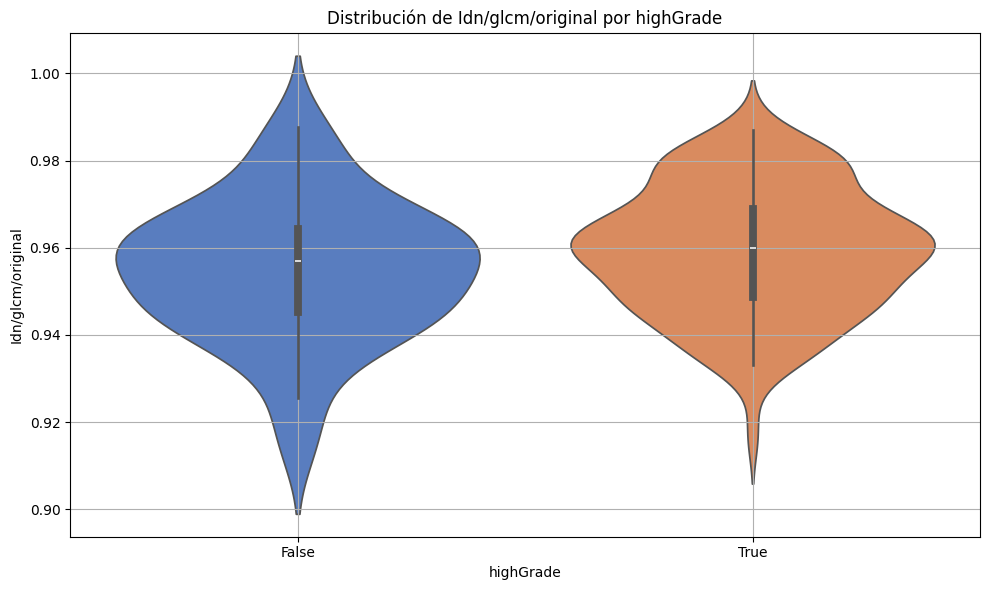

In [50]:
# Revisar la distribución de los valores de Idn/glcm/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['Idn/glcm/original'], palette='muted')
plt.title('Distribución de Idn/glcm/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('Idn/glcm/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
# Encontrar el promedio de Idn/glcm/original para cada clase
mean_values = df.groupby('highGrade')['Idn/glcm/original'].mean()
print("\nPromedio de Idn/glcm/original por clase:")
print(mean_values)


Promedio de Idn/glcm/original por clase:
highGrade
False    0.954748
True     0.959209
Name: Idn/glcm/original, dtype: float64


## SmallDependenceLowGrayLevelEmphasis/gldm/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\3054950518.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['SmallDependenceLowGrayLevelEmphasis/gldm/original'], palette='muted')


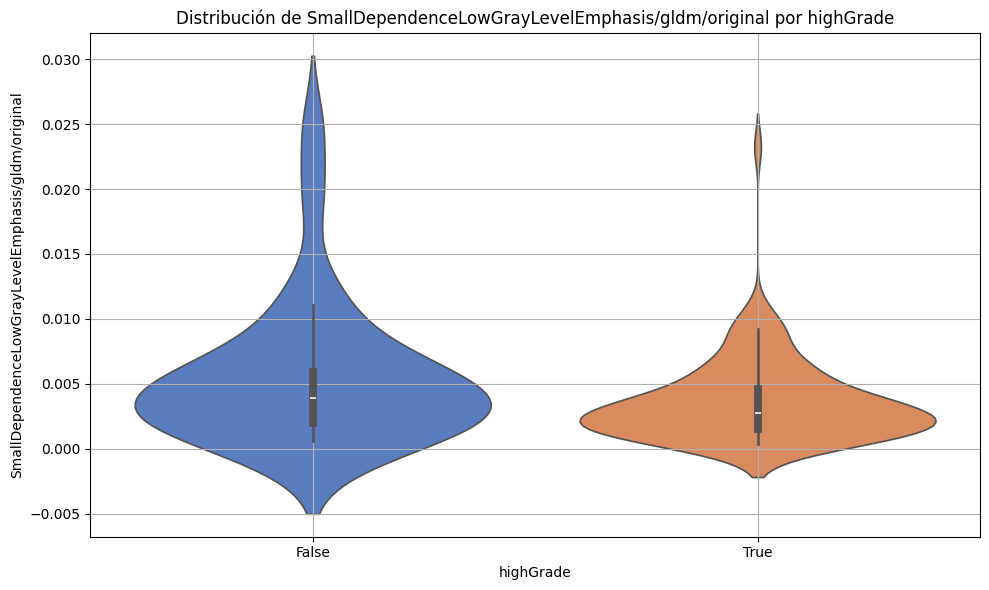

In [52]:
# Revisar la distribución de los valores de SmallDependenceLowGrayLevelEmphasis/gldm/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['SmallDependenceLowGrayLevelEmphasis/gldm/original'], palette='muted')
plt.title('Distribución de SmallDependenceLowGrayLevelEmphasis/gldm/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('SmallDependenceLowGrayLevelEmphasis/gldm/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [53]:
# Encontrar el promedio de SmallDependenceLowGrayLevelEmphasis/gldm/original para cada clase
mean_values = df.groupby('highGrade')['SmallDependenceLowGrayLevelEmphasis/gldm/original'].mean()
print("\nPromedio de SmallDependenceLowGrayLevelEmphasis/gldm/original por clase:")
print(mean_values)


Promedio de SmallDependenceLowGrayLevelEmphasis/gldm/original por clase:
highGrade
False    0.005567
True     0.003607
Name: SmallDependenceLowGrayLevelEmphasis/gldm/original, dtype: float64


## Coarseness/ngtdm/original

C:\Users\juank\AppData\Local\Temp\ipykernel_21336\3241031536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['highGrade'], y=df['Coarseness/ngtdm/original'], palette='muted')


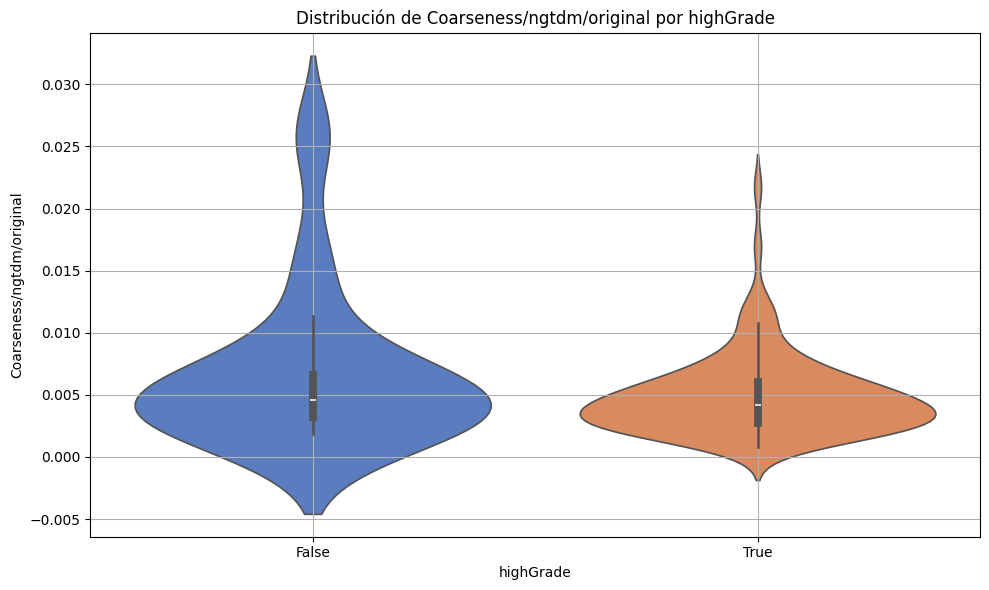

In [54]:
# Revisar la distribución de los valores de Coarseness/ngtdm/original para la clase highGrade
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['highGrade'], y=df['Coarseness/ngtdm/original'], palette='muted')
plt.title('Distribución de Coarseness/ngtdm/original por highGrade')
plt.xlabel('highGrade')
plt.ylabel('Coarseness/ngtdm/original')
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
# Encontrar el promedio de Coarseness/ngtdm/original para cada clase
mean_values = df.groupby('highGrade')['Coarseness/ngtdm/original'].mean()
print("\nPromedio de Coarseness/ngtdm/original por clase:")
print(mean_values)


Promedio de Coarseness/ngtdm/original por clase:
highGrade
False    0.006786
True     0.004896
Name: Coarseness/ngtdm/original, dtype: float64


# Pruebas estadísticas para las features

In [56]:
selected_features = [
    'y.CenterOfMassIndex/Mask-original/diagnostics',
    'y.BoundingBox/Mask-original/diagnostics',
    'RunLengthNonUniformity/glrlm/original',
    'GrayLevelNonUniformity/glszm/original',
    'GrayLevelNonUniformity/glrlm/original',
    'LargeDependenceHighGrayLevelEmphasis/gldm/original',
    'Energy/firstorder/original',
    'ZoneEntropy/glszm/original',
    'VoxelNum/Mask-original/diagnostics',
    'TotalEnergy/firstorder/original',
    'Maximum/Image-original/diagnostics',
    'Idn/glcm/original',
    'SmallDependenceLowGrayLevelEmphasis/gldm/original',
    'Coarseness/ngtdm/original',
]

In [57]:
#Hacer una prueba f de anova sobre las features seleccionadas

from scipy.stats import f_oneway
# Definir las características seleccionadas

# Crear un DataFrame con las características seleccionadas
anova_df = df[selected_features + ['highGrade']].copy()
# Agrupar los datos por la variable objetivo
grouped = anova_df.groupby('highGrade')
# Realizar la prueba ANOVA F
anova_results = {}
for feature in selected_features:
    groups = [group[feature].values for name, group in grouped]
    f_stat, p_value = f_oneway(*groups)
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_value}
# Convertir los resultados a un DataFrame
anova_results_df = pd.DataFrame(anova_results).T
# Mostrar los resultados de la prueba ANOVA F
print("\nResultados de la prueba ANOVA F:")
print(anova_results_df.sort_values(by='p-value'))


Resultados de la prueba ANOVA F:
                                                    F-statistic   p-value
y.CenterOfMassIndex/Mask-original/diagnostics          7.180777  0.008353
SmallDependenceLowGrayLevelEmphasis/gldm/original      5.876691  0.016762
y.BoundingBox/Mask-original/diagnostics                5.675474  0.018699
Coarseness/ngtdm/original                              4.612917  0.033646
RunLengthNonUniformity/glrlm/original                  3.878210  0.051111
GrayLevelNonUniformity/glszm/original                  3.721978  0.055949
Energy/firstorder/original                             3.055256  0.082912
GrayLevelNonUniformity/glrlm/original                  2.751701  0.099638
LargeDependenceHighGrayLevelEmphasis/gldm/original     2.467607  0.118723
ZoneEntropy/glszm/original                             2.339397  0.128645
VoxelNum/Mask-original/diagnostics                     2.161444  0.144004
TotalEnergy/firstorder/original                        2.134293  0.146526
Maxi

In [58]:
# Hacer una prueba de mutual information sobre las features seleccionadas
from sklearn.feature_selection import mutual_info_classif
# Calcular la información mutua
mi_scores = mutual_info_classif(anova_df[selected_features], anova_df['highGrade'], discrete_features=True)
# Crear un DataFrame con los resultados
mi_results_df = pd.DataFrame({
    'Feature': selected_features,
    'Mutual Information': mi_scores
}).sort_values(by='Mutual Information', ascending=False)
# Mostrar los resultados de la información mutua
print("\nResultados de la información mutua:")
print(mi_results_df)



Resultados de la información mutua:
                                              Feature  Mutual Information
0       y.CenterOfMassIndex/Mask-original/diagnostics            0.535089
2               RunLengthNonUniformity/glrlm/original            0.535089
4               GrayLevelNonUniformity/glrlm/original            0.535089
3               GrayLevelNonUniformity/glszm/original            0.535089
5   LargeDependenceHighGrayLevelEmphasis/gldm/orig...            0.535089
6                          Energy/firstorder/original            0.535089
12  SmallDependenceLowGrayLevelEmphasis/gldm/original            0.535089
9                     TotalEnergy/firstorder/original            0.535089
11                                  Idn/glcm/original            0.535089
13                          Coarseness/ngtdm/original            0.535089
7                          ZoneEntropy/glszm/original            0.535089
8                  VoxelNum/Mask-original/diagnostics            0.535089
1

c:\Users\juank\OneDrive\Escritorio\Universidad\PDG\cRP_AIRAD01-BrainTumors-20250328T033605Z-001\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\juank\OneDrive\Escritorio\Universidad\PDG\cRP_AIRAD01-BrainTumors-20250328T033605Z-001\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\juank\OneDrive\Escritorio\Universidad\PDG\cRP_AIRAD01-BrainTumors-20250328T033605Z-001\venv\lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
c:\Users\juank\OneDrive\Escrito

In [59]:
# Hacer una prueba de Coeficiente de Correlación de Pearson sobre las features seleccionadas
from scipy.stats import pearsonr
# Calcular el coeficiente de correlación de Pearson
pearson_results = {}
for feature in selected_features:
    corr, p_value = pearsonr(df[feature], df['highGrade'])
    pearson_results[feature] = {'Correlation': corr, 'p-value': p_value}
# Convertir los resultados a un DataFrame
pearson_results_df = pd.DataFrame(pearson_results).T
# Mostrar los resultados del coeficiente de correlación de Pearson
print("\nResultados del coeficiente de correlación de Pearson:")
print(pearson_results_df.sort_values(by='p-value'))


Resultados del coeficiente de correlación de Pearson:
                                                    Correlation   p-value
y.CenterOfMassIndex/Mask-original/diagnostics          0.232201  0.008353
SmallDependenceLowGrayLevelEmphasis/gldm/original     -0.211097  0.016762
y.BoundingBox/Mask-original/diagnostics                0.207610  0.018699
Coarseness/ngtdm/original                             -0.187929  0.033646
RunLengthNonUniformity/glrlm/original                  0.172801  0.051111
GrayLevelNonUniformity/glszm/original                  0.169387  0.055949
Energy/firstorder/original                             0.153864  0.082912
GrayLevelNonUniformity/glrlm/original                  0.146192  0.099638
LargeDependenceHighGrayLevelEmphasis/gldm/original     0.138593  0.118723
ZoneEntropy/glszm/original                             0.135012  0.128645
VoxelNum/Mask-original/diagnostics                     0.129865  0.144004
TotalEnergy/firstorder/original                        0.

In [60]:
# Hacer una prueba de Análisis Discriminante Lineal (LDA) sobre las features seleccionadas
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Definir el modelo LDA
lda = LinearDiscriminantAnalysis()
# Ajustar el modelo LDA
lda.fit(anova_df[selected_features], anova_df['highGrade'])
# Obtener los coeficientes del modelo LDA
lda_coefficients = lda.coef_[0]
# Crear un DataFrame con los coeficientes LDA
lda_results_df = pd.DataFrame({
    'Feature': selected_features,
    'LDA Coefficient': lda_coefficients
}).sort_values(by='LDA Coefficient', ascending=False)
# Mostrar los resultados del análisis discriminante lineal
print("\nResultados del análisis discriminante lineal (LDA):")
print(lda_results_df)


Resultados del análisis discriminante lineal (LDA):
                                              Feature  LDA Coefficient
0       y.CenterOfMassIndex/Mask-original/diagnostics     1.707986e-02
4               GrayLevelNonUniformity/glrlm/original     3.064956e-03
2               RunLengthNonUniformity/glrlm/original     1.023331e-03
10                 Maximum/Image-original/diagnostics     1.239636e-04
5   LargeDependenceHighGrayLevelEmphasis/gldm/orig...     7.854982e-05
9                     TotalEnergy/firstorder/original    -1.690831e-11
6                          Energy/firstorder/original    -1.973098e-10
8                  VoxelNum/Mask-original/diagnostics    -1.501784e-04
1             y.BoundingBox/Mask-original/diagnostics    -3.478515e-03
3               GrayLevelNonUniformity/glszm/original    -9.573544e-03
7                          ZoneEntropy/glszm/original    -7.543515e-01
11                                  Idn/glcm/original    -2.504481e+01
13                      

In [61]:
# Hacer prueba de Mann-Whitney U para comparar las distribuciones de las características seleccionadas entre las dos clases
from scipy.stats import mannwhitneyu
# Definir un diccionario para almacenar los resultados
mannwhitney_results = {}
# Iterar sobre las características seleccionadas
for feature in selected_features:
    # Obtener los valores de la característica para cada clase
    group1 = anova_df[anova_df['highGrade'] == True][feature]
    group2 = anova_df[anova_df['highGrade'] == False][feature]
    # Realizar la prueba de Mann-Whitney U
    stat, p_value = mannwhitneyu(group1, group2)
    mannwhitney_results[feature] = {'U-statistic': stat, 'p-value': p_value}
# Convertir los resultados a un DataFrame
mannwhitney_results_df = pd.DataFrame(mannwhitney_results).T
# Mostrar los resultados de la prueba de Mann-Whitney U
print("\nResultados de la prueba de Mann-Whitney U:")
print(mannwhitney_results_df.sort_values(by='p-value'))


Resultados de la prueba de Mann-Whitney U:
                                                    U-statistic   p-value
y.CenterOfMassIndex/Mask-original/diagnostics            1990.0  0.001613
y.BoundingBox/Mask-original/diagnostics                  1911.5  0.006791
SmallDependenceLowGrayLevelEmphasis/gldm/original        1088.0  0.048247
GrayLevelNonUniformity/glszm/original                    1746.0  0.077635
Energy/firstorder/original                               1738.0  0.085607
RunLengthNonUniformity/glrlm/original                    1738.0  0.085607
LargeDependenceHighGrayLevelEmphasis/gldm/original       1711.0  0.117501
ZoneEntropy/glszm/original                               1703.0  0.128558
TotalEnergy/firstorder/original                          1689.0  0.149833
VoxelNum/Mask-original/diagnostics                       1672.0  0.179156
GrayLevelNonUniformity/glrlm/original                    1663.0  0.196313
Idn/glcm/original                                        1662.0  0.1

In [62]:
# Hacer una prueba de redundancia para evaluar la redundancia entre las características seleccionadas
from sklearn.feature_selection import VarianceThreshold
# Definir un umbral de varianza
threshold = 0
# Crear un objeto VarianceThreshold
vt = VarianceThreshold(threshold=threshold)
# Ajustar el objeto VarianceThreshold a los datos
vt.fit(anova_df[selected_features])
# Obtener las características seleccionadas
selected_features_vt = anova_df[selected_features].columns[vt.get_support()]
# Crear un DataFrame con las características seleccionadas
redundancy_results_df = pd.DataFrame({
    'Feature': selected_features_vt,
    'Variance': vt.variances_[vt.get_support()]
}).sort_values(by='Variance', ascending=False)
# Mostrar los resultados de la prueba de redundancia
print("\nResultados de la prueba de redundancia:")
print(redundancy_results_df)



Resultados de la prueba de redundancia:
                                              Feature      Variance
9                     TotalEnergy/firstorder/original  2.071770e+10
6                          Energy/firstorder/original  7.450689e+09
5   LargeDependenceHighGrayLevelEmphasis/gldm/orig...  3.346599e+04
8                  VoxelNum/Mask-original/diagnostics  2.823200e+04
2               RunLengthNonUniformity/glrlm/original  6.100139e+03
10                 Maximum/Image-original/diagnostics  3.667000e+03
4               GrayLevelNonUniformity/glrlm/original  1.586047e+03
0       y.CenterOfMassIndex/Mask-original/diagnostics  2.747635e+02
1             y.BoundingBox/Mask-original/diagnostics  2.480000e+02
3               GrayLevelNonUniformity/glszm/original  1.371314e+02
7                          ZoneEntropy/glszm/original  7.743775e-01
11                                  Idn/glcm/original  2.160569e-04
13                          Coarseness/ngtdm/original  1.771768e-05
12  Sma